# Check the Azure ML SDK Version

In [2]:
import azureml.core
print("Ready to use Azure ML", azureml.core.VERSION)

Ready to use Azure ML 1.6.0


# Connect to Your Workspace
The code below uses the configuration file to connect to your workspace. The first time you run it in a notebook session, you'll be prompted to sign into Azure by clicking the https://microsoft.com/devicelogin link, entering an automatically generated code, and signing into Azure. After you have successfully signed in, you can close the browser tab that was opened and return to this notebook.

After you successfully logged in you could see the below message.

"You have signed in to the Microsoft Azure Cross-platform Command Line Interface application on your device. You may now close this window."

In [3]:
from azureml.core import Workspace

ws = Workspace.from_config()
print(ws.name, "loaded")


dp101-workspace loaded


# Run an Experiment
In this exercise, you'll learn how to use an Azure ML experiment to run Python code and record values extracted from data.
The code uses an Azure ML experiment to log details of the run.

In [4]:
from azureml.core import Experiment
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Create an Azure ML experiment in your workspace
experiment = Experiment(workspace = ws, name = "diabetes-experiment")


# Start logging data from the experiment
run = experiment.start_logging()
#run = experiment.start_logging(outputs=None, snapshot_directory=".")
print("Starting experiment:", experiment.name)

# load the data from a local file
data = pd.read_csv('../mslearn-aml-labs/data/diabetes.csv')

# Count the rows and log the result
row_count = (len(data))
run.log('observations', row_count)
print('Analyzing {} rows of data'.format(row_count))



Starting experiment: diabetes-experiment
Analyzing 10000 rows of data


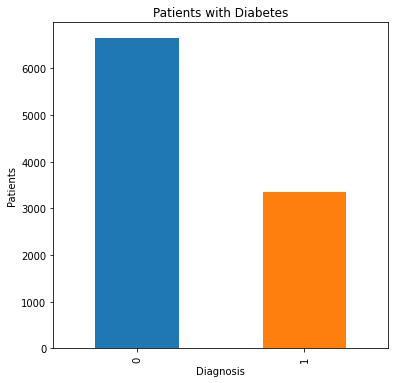

In [5]:
# Plot and log the count of diabetic vs non-diabetic patients
diabetic_counts = data['Diabetic'].value_counts()
fig = plt.figure(figsize=(6,6))
ax = fig.gca()    
diabetic_counts.plot.bar(ax = ax) 
ax.set_title('Patients with Diabetes') 
ax.set_xlabel('Diagnosis') 
ax.set_ylabel('Patients')
plt.show()
run.log_image(name = 'label distribution', plot = fig)

In [6]:
# log distinct pregnancy counts
pregnancies = data.Pregnancies.unique()
run.log_list('pregnancy categories', pregnancies)

In [7]:
# Log summary statistics for numeric columns
med_columns = ['PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI']
summary_stats = data[med_columns].describe().to_dict()
for col in summary_stats:
    keys = list(summary_stats[col].keys())
    values = list(summary_stats[col].values())
    for index in range(len(keys)):
        run.log_row(col, stat = keys[index], value = values[index])
        
        
# Save a sample of the data and upload it to the experiment output
data.sample(100).to_csv('sample.csv', index=False, header=True)
run.upload_file(name = 'outputs/sample.csv', path_or_stream = './sample.csv')

# Complete the run
run.complete()

# View Experiment Results
After the experiment has been finished, you can use the run object to get information about the run and its outputs:

In [8]:
import json

# Get run details
details = run.get_details()
print(details)

# Get logged metrics
metrics = run.get_metrics()
print(json.dumps(metrics, indent=2))

# Get output files
files = run.get_file_names()
print(json.dumps(files, indent=2))

{'runId': '86f9934e-3d11-4aad-ae3f-5b3f9bd1291d', 'target': 'sdk', 'status': 'Completed', 'startTimeUtc': '2020-06-02T06:18:54.048334Z', 'endTimeUtc': '2020-06-02T06:19:13.427863Z', 'properties': {'ContentSnapshotId': '0d778e50-e3f9-4ab7-9dd2-631aec769912'}, 'inputDatasets': [], 'logFiles': {}}
{
  "observations": 10000,
  "label distribution": "aml://artifactId/ExperimentRun/dcid.86f9934e-3d11-4aad-ae3f-5b3f9bd1291d/label distribution_1591078742.png",
  "pregnancy categories": [
    0,
    8,
    7,
    9,
    1,
    3,
    5,
    2,
    6,
    11,
    4,
    13,
    10,
    12,
    14
  ],
  "PlasmaGlucose": {
    "stat": [
      "count",
      "mean",
      "std",
      "min",
      "25%",
      "50%",
      "75%",
      "max"
    ],
    "value": [
      10000.0,
      107.8502,
      31.920909360565563,
      44,
      84,
      105,
      129,
      192
    ]
  },
  "DiastolicBloodPressure": {
    "stat": [
      "count",
      "mean",
      "std",
      "min",
      "25%",
      

# RunDetails widget 
to get a better visualization of the run details,

In [9]:
from azureml.widgets import RunDetails

RunDetails(run).show()

_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…